# 기본 케라스 구조

### 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [17]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.

In [5]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.6651 - accuracy: 0.8329
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3367 - accuracy: 0.9055
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2908 - accuracy: 0.9177
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2637 - accuracy: 0.9250
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2441 - accuracy: 0.9307


### 5. 학습과정 그래프로 확인 

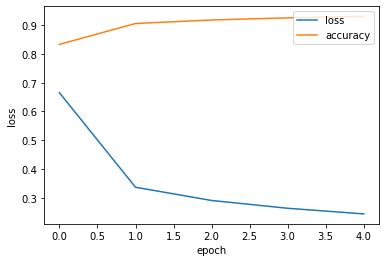

In [6]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

### 6. 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

In [7]:
print('## training loss and accuracy ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

## training loss and accuracy ##
[0.6651392723997434, 0.3367418193499247, 0.29081982481678326, 0.26373377341926096, 0.24414981716473896]
[0.8329333, 0.9054667, 0.9176667, 0.92503333, 0.9306833]


### 7. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [8]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.2326 - accuracy: 0.9332
## evaluation loss and_metrics ##
[0.23255313705801964, 0.9332]


### 8. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [9]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[1.6491963e-04 8.4455145e-08 1.3236255e-04 2.8724913e-03 1.0051133e-06
  9.7365148e-05 1.0039976e-07 9.9620700e-01 3.8596478e-05 4.8603062e-04]]


### 9. 러닝 모델 가시화 기능 확인

In [19]:
# import pydot
# import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


AttributeError: 'NoneType' object has no attribute 'create'

### 10. 모델 저장과 모델 로딩 

In [13]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')